> # **Análisis Exploratorio de Datos (EDA)**

## **Librerías**

In [ ]:
# Data Analysis
import os
import numpy as np
import pandas as pd
import pickle

# Funciones
# from utils.funciones import prueba

# Data Visualization
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image
import cv2
import seaborn as sns

# Control de versiones
print('Numpy version: {}'.format(np.__version__))
print('Pandas version: {}'.format(pd.__version__))
print('Seaborn version: {}'.format(sns.__version__))

Numpy version: 1.26.4
Pandas version: 2.2.2
Seaborn version: 0.13.2


## **Rutas**

In [ ]:
# Rutas de cada carpeta: train-test-val:
train_path = "/content/drive/MyDrive/Colab Notebooks/MAIZ/src/data/data_splitted/train"
test_path = "/content/drive/MyDrive/Colab Notebooks/MAIZ/src/data/data_splitted/test"
val_path = "/content/drive/MyDrive/Colab Notebooks/MAIZ/src/data/data_splitted/val"

In [ ]:
# Clases en cada carpeta:
print("Clases en carpeta train: {}".format(os.listdir("/content/drive/MyDrive/Colab Notebooks/MAIZ/src/data/data_splitted/train")))
print("Clases en carpeta test: {}".format(os.listdir("/content/drive/MyDrive/Colab Notebooks/MAIZ/src/data/data_splitted/test")))
print("Clases en carpeta val: {}".format(os.listdir("/content/drive/MyDrive/Colab Notebooks/MAIZ/src/data/data_splitted/val")))

Clases en carpeta train: ['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']
Clases en carpeta test: ['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']
Clases en carpeta val: ['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']


In [ ]:
# Clases
clases = os.listdir("/content/drive/MyDrive/Colab Notebooks/MAIZ/src/data/data_splitted/train")
clases

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

## **1. Visualización de Data**

In [ ]:
def visualizacion_imagenes(folder_path, n_imagenes_x_clase):
  images = []
  labels = []
  # Iteramos en clases
  for class_name in clases: # lista nombres clases
    # Lista de las imagenes
    images_names = os.listdir(folder_path +'/'+ class_name)
    # Iteramos en las imagenes
    for img_name in images_names[0:n_imagenes_x_clase]:
      image_path = folder_path +'/'+ class_name +'/'+ img_name
      images.append(image_path)
      labels.append(class_name)

  return images, labels

In [ ]:
# Visualizamos 4 imagenes de cada clase en el dataset Train:
images, labels = visualizacion_imagenes(train_path, 4)

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20, 19))
ax = ax.flatten()
for i in range(16): # iteramos 16 veces porque son 16 imagenes
    ax = plt.subplot(4,4,i+1)
    plt.imshow(cv2.cvtColor(cv2.imread(images[i]), cv2.COLOR_BGR2RGB)) # mostramos la imagen a color
    plt.title(labels[i])
fig.suptitle('Train images')

Output hidden; open in https://colab.research.google.com to view.

## **2. Creamos datasets: Train-Test-Val**

Transformamos los datasets en arrays

In [ ]:
# Creamos una funcion para obtener los datasets con las imagenes (en array)
def creacion_dataset(folder_path):
  dataset = [] # lista con todas las imagenes (rutas)
  # Iteramos en clases
  for class_name in clases: # lista nombres clases
    # Lista de las imagenes
    images_names = os.listdir(folder_path +'/'+ class_name)
    # Iteramos en las imagenes
    for img_name in images_names:
      image_path = folder_path +'/'+ class_name +'/'+ img_name
      image_array = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB) # pasamos la imagen a array con la imagen a color
      dataset.append(image_array) # agregamos el array a la lista

  return dataset

In [ ]:
# Creamos los datasets train-test-val:
train = creacion_dataset(train_path)
test = creacion_dataset(test_path)
val = creacion_dataset(val_path)

In [ ]:
def guardar_dataset(dataset, ruta):
  # Ruta donde queremos guardar el dataset
  # Guardamos el dataset con pickle:
  with open(ruta, 'wb') as archivo:
    pickle.dump(dataset, archivo)


In [ ]:
# Guardamos los datasets:
# Rutas
train_path = "/content/drive/MyDrive/Colab Notebooks/MAIZ/src/data/data_splitted/train"
test_path = "/content/drive/MyDrive/Colab Notebooks/MAIZ/src/data/data_splitted/test"
val_path = "/content/drive/MyDrive/Colab Notebooks/MAIZ/src/data/data_splitted/val"

# Guardado
guardar_dataset(train,train_path)
guardar_dataset(test,test_path)
guardar_dataset(val,val_path)


Visualizamos los % de Train-Test-Val:

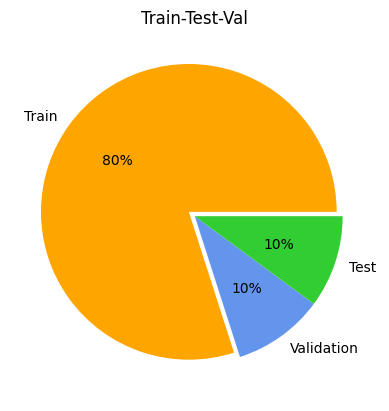

In [ ]:
# Grafico Pie
plt.pie([len(train), len(val), len(test)],
        labels=['Train', 'Validation', 'Test'],
        autopct='%.f%%',
        colors=['orange', 'cornflowerblue', 'limegreen'],
        explode=(0.05, 0, 0))
plt.title("Train-Test-Val")
plt.show()

## **3. Cantidad de Imágenes**

In [ ]:
print("Dataset train: {} imagenes".format(len(train)))
print("Dataset test: {} imagenes".format(len(test)))
print("Dataset val: {} imagenes".format(len(val)))
print("Total Imagenes: {}".format(len(train)+len(test)+len(val)))

Dataset train: 3348 imagenes
Dataset test: 423 imagenes
Dataset val: 417 imagenes
Total Imagenes: 4188


## **4. Dimensiones/Shape de cada Dataset**
Como las imagenes son a color, cada pixel de cada imagen va a tener 3 canales: (red, green, blue) y entonces usaríamos altoxanchox3 = n° total neuronas de entrada.

Dimensiones: ***(nº total de muestras, altura, anchura, capas por píxel)***

In [ ]:
# Creamos una función para observar que dimensiones/shape tienen las imágenes
# dicha función nos devolvera un diccionario con las keys (ancho, alto, channels) y la cantidad de imágenes que tienen esa dimensión

def dimensiones_imagenes(dataset):
  # Creamos una lista con todas las dimensiones que hay
  l_shapes = []
  for i in range(0,len(dataset)):
    shape = dataset[i].shape
    l_shapes.append(shape)
  # Creamos un diccionario donde las keys son las dimensiones, los values el n° de veces que esta esa dimension
  d = {}
  for shape in l_shapes:
    if shape in d: # si la dimension esta en el d, le sumanos 1 a su value
      d[shape]+=1

    else:
      d[shape] = 1 # si no esta en el d, introducimos esa dimension y su value es 1
  # Iteramos en el diccionario creado
  for key in d:
    print("{} --> {} imagenes".format(key, d[key]))

  return d

In [ ]:
# Visualizamos las dimensiones en train
train_shapes = dimensiones_imagenes(train)
print("-----------------------")
print("train:  {} tipos de dimensiones".format(len(train_shapes)))

(371, 788, 3) --> 1 imagenes
(256, 256, 3) --> 3089 imagenes
(482, 641, 3) --> 1 imagenes
(200, 300, 3) --> 3 imagenes
(421, 1080, 3) --> 1 imagenes
(237, 363, 3) --> 1 imagenes
(279, 519, 3) --> 1 imagenes
(1125, 1500, 3) --> 3 imagenes
(339, 300, 3) --> 1 imagenes
(1936, 2592, 3) --> 1 imagenes
(240, 362, 3) --> 1 imagenes
(3264, 1489, 3) --> 1 imagenes
(200, 250, 3) --> 1 imagenes
(2731, 1819, 3) --> 1 imagenes
(2448, 2448, 3) --> 1 imagenes
(1600, 1200, 3) --> 3 imagenes
(374, 594, 3) --> 1 imagenes
(335, 662, 3) --> 1 imagenes
(1200, 1158, 3) --> 1 imagenes
(612, 450, 3) --> 1 imagenes
(3071, 884, 3) --> 1 imagenes
(2448, 3264, 3) --> 6 imagenes
(414, 675, 3) --> 1 imagenes
(463, 618, 3) --> 1 imagenes
(611, 995, 3) --> 1 imagenes
(267, 400, 3) --> 1 imagenes
(534, 334, 3) --> 1 imagenes
(417, 635, 3) --> 1 imagenes
(290, 432, 3) --> 1 imagenes
(512, 1024, 3) --> 2 imagenes
(400, 600, 3) --> 2 imagenes
(317, 188, 3) --> 1 imagenes
(768, 1024, 3) --> 7 imagenes
(540, 960, 3) --> 2 

In [ ]:
# Visualizamos las dimensiones en test
test_shapes = dimensiones_imagenes(test)
print("-----------------------")
print("test:  {} tipos de dimensiones".format(len(test_shapes)))

(256, 256, 3) --> 384 imagenes
(404, 606, 3) --> 1 imagenes
(309, 497, 3) --> 1 imagenes
(250, 332, 3) --> 1 imagenes
(400, 400, 3) --> 1 imagenes
(449, 246, 3) --> 1 imagenes
(1296, 1936, 3) --> 1 imagenes
(324, 432, 3) --> 2 imagenes
(699, 525, 3) --> 1 imagenes
(480, 640, 3) --> 1 imagenes
(833, 521, 3) --> 1 imagenes
(302, 400, 3) --> 1 imagenes
(385, 256, 3) --> 1 imagenes
(300, 300, 3) --> 1 imagenes
(2592, 1944, 3) --> 1 imagenes
(827, 1536, 3) --> 1 imagenes
(1200, 675, 3) --> 2 imagenes
(500, 500, 3) --> 1 imagenes
(2448, 3264, 3) --> 1 imagenes
(3264, 1836, 3) --> 1 imagenes
(116, 292, 3) --> 1 imagenes
(569, 1218, 3) --> 1 imagenes
(350, 750, 3) --> 1 imagenes
(750, 1000, 3) --> 1 imagenes
(1125, 1500, 3) --> 1 imagenes
(257, 765, 3) --> 1 imagenes
(720, 960, 3) --> 1 imagenes
(1000, 1333, 3) --> 1 imagenes
(768, 1024, 3) --> 1 imagenes
(194, 309, 3) --> 1 imagenes
(700, 613, 3) --> 1 imagenes
(378, 482, 3) --> 1 imagenes
(394, 700, 3) --> 1 imagenes
(337, 508, 3) --> 1 imag

In [ ]:
# Visualizamos las dimensiones en val
val_shapes = dimensiones_imagenes(val)
print("-----------------------")
print("val:  {} tipos de dimensiones".format(len(val_shapes)))


(585, 1000, 3) --> 1 imagenes
(256, 256, 3) --> 379 imagenes
(340, 255, 3) --> 1 imagenes
(334, 400, 3) --> 1 imagenes
(400, 300, 3) --> 1 imagenes
(350, 432, 3) --> 1 imagenes
(283, 505, 3) --> 1 imagenes
(577, 1024, 3) --> 1 imagenes
(766, 400, 3) --> 1 imagenes
(1600, 1200, 3) --> 2 imagenes
(3264, 2448, 3) --> 1 imagenes
(350, 194, 3) --> 1 imagenes
(3000, 4000, 3) --> 1 imagenes
(335, 365, 3) --> 1 imagenes
(889, 500, 3) --> 1 imagenes
(758, 1024, 3) --> 1 imagenes
(887, 600, 3) --> 1 imagenes
(3456, 4608, 3) --> 1 imagenes
(400, 273, 3) --> 1 imagenes
(1024, 1022, 3) --> 1 imagenes
(480, 640, 3) --> 1 imagenes
(675, 900, 3) --> 1 imagenes
(350, 750, 3) --> 1 imagenes
(958, 1278, 3) --> 1 imagenes
(2560, 1440, 3) --> 1 imagenes
(1897, 1790, 3) --> 1 imagenes
(501, 612, 3) --> 1 imagenes
(583, 694, 3) --> 1 imagenes
(263, 400, 3) --> 1 imagenes
(179, 310, 3) --> 1 imagenes
(1368, 1712, 3) --> 1 imagenes
(849, 900, 3) --> 1 imagenes
(1152, 2048, 3) --> 1 imagenes
(419, 288, 3) --> 1

## **5. Comprensión de las Variables**

train

In [ ]:
# Array de 4D con la info de todas las imagenes (el valor de los pixeles de todas las imagenes).
# Observemos la info de las primeras 3 imágenes
train[:3]

[array([[[ 79,  87,  28],
         [ 73,  81,  24],
         [ 74,  83,  28],
         ...,
         [ 88, 111,   3],
         [ 88, 111,   3],
         [ 88, 111,   3]],
 
        [[ 83,  93,  32],
         [ 80,  90,  30],
         [ 79,  90,  32],
         ...,
         [ 84, 107,   1],
         [ 84, 107,   1],
         [ 84, 107,   1]],
 
        [[ 70,  85,  18],
         [ 71,  86,  21],
         [ 69,  85,  22],
         ...,
         [ 83, 108,   6],
         [ 85, 107,   6],
         [ 85, 107,   6]],
 
        ...,
 
        [[ 96, 132,  22],
         [ 94, 130,  20],
         [ 99, 133,  23],
         ...,
         [ 80, 118,  15],
         [ 76, 114,  11],
         [ 75, 113,  10]],
 
        [[ 98, 132,  20],
         [ 95, 129,  17],
         [ 97, 131,  21],
         ...,
         [ 78, 116,  15],
         [ 74, 112,  11],
         [ 73, 111,  10]],
 
        [[100, 134,  22],
         [ 96, 130,  18],
         [ 98, 132,  22],
         ...,
         [ 75, 113,  12],
  

array([[[ 79,  87,  28],
        [ 73,  81,  24],
        [ 74,  83,  28],
        ...,
        [ 88, 111,   3],
        [ 88, 111,   3],
        [ 88, 111,   3]],

       [[ 83,  93,  32],
        [ 80,  90,  30],
        [ 79,  90,  32],
        ...,
        [ 84, 107,   1],
        [ 84, 107,   1],
        [ 84, 107,   1]],

       [[ 70,  85,  18],
        [ 71,  86,  21],
        [ 69,  85,  22],
        ...,
        [ 83, 108,   6],
        [ 85, 107,   6],
        [ 85, 107,   6]],

       ...,

       [[ 96, 132,  22],
        [ 94, 130,  20],
        [ 99, 133,  23],
        ...,
        [ 80, 118,  15],
        [ 76, 114,  11],
        [ 75, 113,  10]],

       [[ 98, 132,  20],
        [ 95, 129,  17],
        [ 97, 131,  21],
        ...,
        [ 78, 116,  15],
        [ 74, 112,  11],
        [ 73, 111,  10]],

       [[100, 134,  22],
        [ 96, 130,  18],
        [ 98, 132,  22],
        ...,
        [ 75, 113,  12],
        [ 73, 111,  10],
        [ 71, 109,   8]]], dtype=uint8)
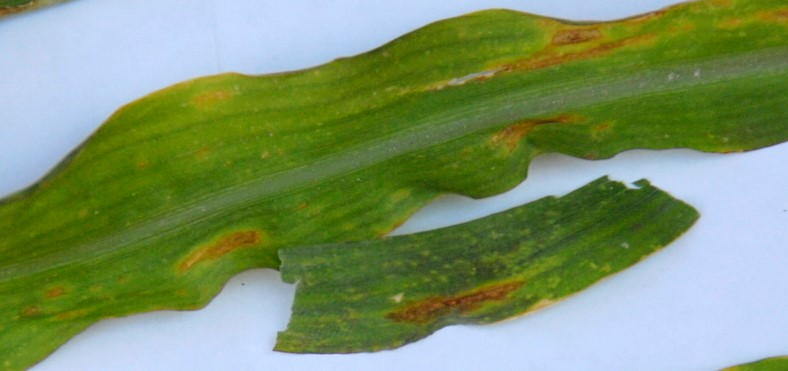

In [ ]:
# Con el 1° array obtenemos la info de la 1° imagen en formato matriz que es un array de 3D
train[0]

In [ ]:
# Con el 2° array obtenemos un array de 2D que nos lleva al n° de fila de esa imagen [[valor canal rojo, valor canal verde, valor canal azul],....[]]
train[0][1]

array([[ 83,  93,  32],
       [ 80,  90,  30],
       [ 79,  90,  32],
       ...,
       [ 84, 107,   1],
       [ 84, 107,   1],
       [ 84, 107,   1]], dtype=uint8)

In [ ]:
# Con el 3° array obtenemos el valor de ese pixel
# Recordemos que cada pixel esta compuesto de 3 canales para el rojo, verde, azul por eso tiene 3 valores cada pixel
train[0][1][0]

array([83, 93, 32], dtype=uint8)

## **6. Dimensión - N° de Pixeles** (se puede sacar)

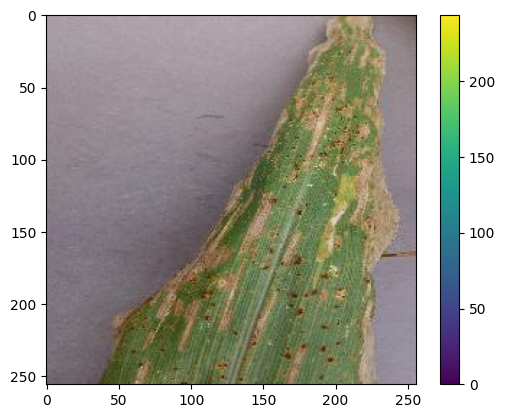

In [ ]:
# Observamos que valores toma cada pixel
plt.figure()
plt.imshow(train[3]), #cmap = "Greys")
plt.colorbar()
plt.grid(False)
plt.show()

## **7. Distribución de cada clase/target**

Al ser un problema de ML de clasificación, debemos procurar que nuestros datos en train estén balanceados. Vamos a comprobarlo:

In [ ]:
def distribución_x_clase(train_path):
  # Creamos un diccionario con {clase: n° de imagenes de esa clase}
  name_clases = os.listdir(train_path)
  d = {}
  for name_clase in name_clases:
    clase = os.listdir(train_path + '/' + name_clase)
    d[name_clase] = len(clase)

  # Creamos el df
  df = pd.DataFrame(columns = ["Class_Name", "N° of Images"])
  # Insertamos los valores en cada columna del df
  df['Class_Name'] = d.keys()
  df["N° of Images"] = d.values()

  return df

In [ ]:
train_path = "/content/drive/MyDrive/Colab Notebooks/MAIZ/src/data/data_splitted/train"
df_train = distribución_x_clase(train_path)
df_train

,Class_Name,N° of Images
0,Blight,916
1,Common_Rust,1044
2,Gray_Leaf_Spot,459
3,Healthy,929


In [ ]:
# Funcion de Distribucion de imagenes por Clase:
def class_distribution(df):

  plt.figure(figsize=(9,4))
  ax = sns.barplot(x=df['Class_Name'], y=df["N° of Images"], palette='Greens_d')
  plt.title('Tamaño muestral en train')
  plt.ylabel('', fontsize=18)
  for bars in ax.containers:
        ax.bar_label(bars)

  plt.show()

<ipython-input-26-b38300f01038>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df['Class_Name'], y=df["N° of Images"], palette='Greens_d')


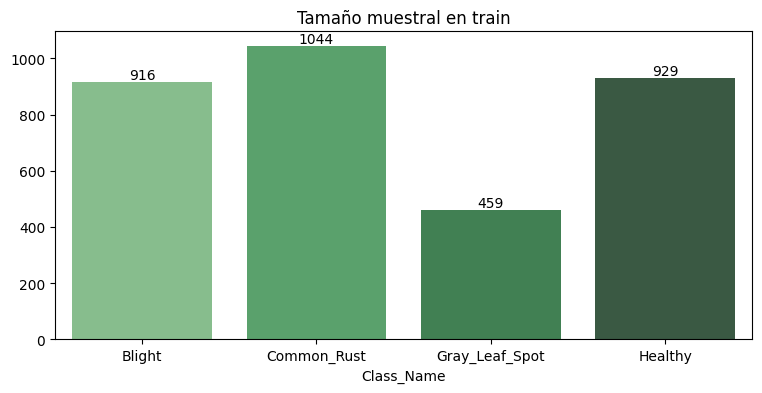

In [ ]:
class_distribution(df_train)

* Observamos que nuestros datos están desbalanceados, es decir nuestra target.

* Es necesario entrenar con un dataset lo más equilibrado/balanceado posible para que la precisión del modelo sea la mas alta posible. Si esto no ocurre, nuestro modelo tendera a predecir con menor frecuencia la clase minoritaria.

* En nuestro caso contamos con una minoria en la clase `Gray_Leaf_Spot`.

## **Conclusiones**:

Nuestro dataset consta de 4188 imágenes clasificadas en 4 categorías/clases de las cuáles son 3 tipos de enfermedades en la planta y otra que se refiere a una planta sana:
1. ***Common Rust*** o roya común - 1306 imagenes
2. ***Gray Leaf Spot*** o mancha foliar gris - 574 imagenes
3. ***Blight*** o marchitamiento bacteriano del maíz/marchitez de Stewart -1146 imagenes
4. ***Healthy*** o sana (Planta sana)- 1162 imagenes



* Podemos observar que estamos trabajando con arrays de diferentes dimensiones, es decir, imágenes con diferentes número de pixeles. Tendremos que homogeneizar las dimensiones a una única para que nuestros modelos entrenen correctamente.

* La dimension que más se repite es de (256, 256, 3).

* Luego del data preprocessing podremos observar el % de clases(target) en cada dataset.  

* Los píxeles toman valores entre 0 y 255. Tendremos que reescalarlos para poder aplicar los Modelos posteriormente.

* Nuestro train (dataset que utilizaremos para el entrenamiento en los modelos) esta desbalanceado.

* Otro punto importante es que dentro de nuestros datasets train-test-val las clases se encuentran ordenadas, es decir, en subcarpetas. Deberemos aplicar técnicas para mezclar aleatoriamente los datos (clases).
